In [21]:
import os
import shutil
from pathlib import Path

from matplotlib import image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
print(Path.cwd().parent)

/data/weijing/ting-dataset-inference


## Folder Path Constants

In [6]:
DATASET_PARENT_DIR_PATH = Path.cwd().parent / "_dataset"
DVC_PARENT_DIR_PATH = DATASET_PARENT_DIR_PATH / "dogs-vs-cats"

# * All
DVC_ALL_DIR_PATH = DVC_PARENT_DIR_PATH / "all"
DVC_ALL_CAT_DIR_PATH = DVC_ALL_DIR_PATH / "cat"
DVC_ALL_DOG_DIR_PATH = DVC_ALL_DIR_PATH / "dog"

# * Training
DVC_TRAIN_DIR_PATH = DVC_PARENT_DIR_PATH / "train"
DVC_TRAIN_CAT_DIR_PATH = DVC_TRAIN_DIR_PATH / "cat"
DVC_TRAIN_DOG_DIR_PATH = DVC_TRAIN_DIR_PATH / "dog"

# * Testing
DVC_TEST_DIR_PATH = DVC_PARENT_DIR_PATH / "test"
DVC_TEST_CAT_DIR_PATH = DVC_TEST_DIR_PATH / "cat"
DVC_TEST_DOG_DIR_PATH = DVC_TEST_DIR_PATH / "dog"

DVC_ALL_CAT_DIR_PATH.mkdir(parents=True, exist_ok=True)
DVC_ALL_DOG_DIR_PATH.mkdir(parents=True, exist_ok=True)
DVC_TRAIN_CAT_DIR_PATH.mkdir(parents=True, exist_ok=True)
DVC_TRAIN_DOG_DIR_PATH.mkdir(parents=True, exist_ok=True)
DVC_TEST_CAT_DIR_PATH.mkdir(parents=True, exist_ok=True)
DVC_TEST_DOG_DIR_PATH.mkdir(parents=True, exist_ok=True)

print(DVC_ALL_CAT_DIR_PATH)
print(DVC_TRAIN_CAT_DIR_PATH)
print(DVC_TEST_CAT_DIR_PATH)


/data/weijing/ting-dataset-inference/_dataset/dogs-vs-cats/all/cat
/data/weijing/ting-dataset-inference/_dataset/dogs-vs-cats/train/cat
/data/weijing/ting-dataset-inference/_dataset/dogs-vs-cats/test/cat


## All (old)

In [8]:
DATASET_PARENT_DIR_PATH = Path.cwd().parent / "_dataset"
RAW_DVC_TRAIN_DIR_PATH = DATASET_PARENT_DIR_PATH / "raw_dogs-vs-cats" / "train"
DVC_TRAIN_DIR_PATH = DATASET_PARENT_DIR_PATH / "dogs-vs-cats" / "train"
DVC_TRAIN_CAT_DIR_PATH = DATASET_PARENT_DIR_PATH / "dogs-vs-cats" / "train" / "cat"
DVC_TRAIN_DOG_DIR_PATH = DATASET_PARENT_DIR_PATH / "dogs-vs-cats" / "train" / "dog"

DVC_TRAIN_CAT_DIR_PATH.mkdir(parents=True, exist_ok=True)
DVC_TRAIN_DOG_DIR_PATH.mkdir(parents=True, exist_ok=True)


In [11]:
# check images
cat_img_paths = []
dog_img_paths = []

for path in RAW_DVC_TRAIN_DIR_PATH.iterdir():
    if path.is_file():
        class_name = path.name.split(".")[0]
        if class_name == "cat":
            cat_img_paths.append(path)
        elif class_name == "dog":
            dog_img_paths.append(path)

print(f"num cat: {len(cat_img_paths)}")
print(f"num dog: {len(dog_img_paths)}")

num cat: 12500
num dog: 12500


In [13]:
print(cat_img_paths[0].name)

<class 'str'>


In [16]:
for img_path in cat_img_paths:
    shutil.copy2(
        src=img_path,
        dst=DVC_TRAIN_CAT_DIR_PATH
    )

for img_path in dog_img_paths:
    shutil.copy2(
        src=img_path,
        dst=DVC_TRAIN_DOG_DIR_PATH
    )


## Preparation for train test split

In [9]:
# collect images
all_cat_img_paths = list(DVC_ALL_CAT_DIR_PATH.iterdir())
all_dog_img_paths = list(DVC_ALL_DOG_DIR_PATH.iterdir())

print(f"num cat: {len(all_cat_img_paths)}")
print(f"num dog: {len(all_dog_img_paths)}")


num cat: 12500
num dog: 12500


In [17]:
result = train_test_split(
    all_cat_img_paths,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
train_cat_img_paths, test_cat_img_paths = result

result = train_test_split(
    all_dog_img_paths,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
train_dog_img_paths, test_dog_img_paths = result


## Copying train & test

In [18]:
for img_path in train_cat_img_paths:
    shutil.copy2(
        src=img_path,
        dst=DVC_TRAIN_CAT_DIR_PATH
    )

for img_path in test_cat_img_paths:
    shutil.copy2(
        src=img_path,
        dst=DVC_TEST_CAT_DIR_PATH
    )

for img_path in train_dog_img_paths:
    shutil.copy2(
        src=img_path,
        dst=DVC_TRAIN_DOG_DIR_PATH
    )

for img_path in test_dog_img_paths:
    shutil.copy2(
        src=img_path,
        dst=DVC_TEST_DOG_DIR_PATH
    )


## Dataset checking

In [19]:
# * check all
cat_img_count = 0
dog_img_count = 0

for path in DVC_ALL_CAT_DIR_PATH.iterdir():
    if path.is_file():
        cat_img_count += 1

for path in DVC_ALL_DOG_DIR_PATH.iterdir():
    if path.is_file():
        dog_img_count += 1

print(f"num cat: {cat_img_count}")
print(f"num dog: {dog_img_count}")

# * check train
cat_img_count = 0
dog_img_count = 0

for path in DVC_TRAIN_CAT_DIR_PATH.iterdir():
    if path.is_file():
        cat_img_count += 1

for path in DVC_TRAIN_DOG_DIR_PATH.iterdir():
    if path.is_file():
        dog_img_count += 1

print(f"num cat: {cat_img_count}")
print(f"num dog: {dog_img_count}")

# * check test
cat_img_count = 0
dog_img_count = 0

for path in DVC_TEST_CAT_DIR_PATH.iterdir():
    if path.is_file():
        cat_img_count += 1

for path in DVC_TEST_DOG_DIR_PATH.iterdir():
    if path.is_file():
        dog_img_count += 1

print(f"num cat: {cat_img_count}")
print(f"num dog: {dog_img_count}")


num cat: 12500
num dog: 12500
num cat: 10000
num dog: 10000
num cat: 2500
num dog: 2500


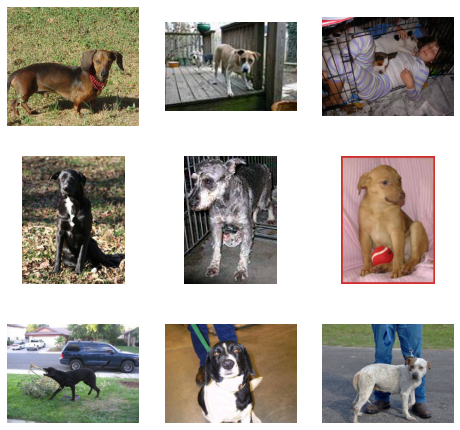

In [27]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(cols * rows):
    img = image.imread(train_dog_img_paths[i])
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(img)

plt.show()
